In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
%matplotlib inline 

In [3]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2

In [4]:
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

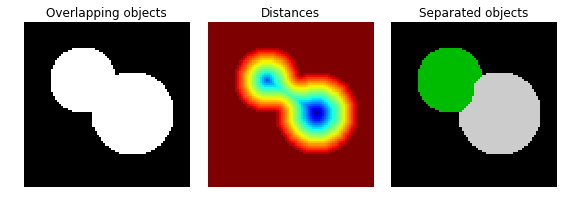

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.7), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax0, ax1, ax2 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Overlapping objects')

ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title('Distances')

ax2.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title('Separated objects')
for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()